<a href="https://colab.research.google.com/github/GeraldineVazquez/EDP-2-/blob/main/Ecuaciondeonda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# Ecuacion de Onda- Método Explícito


## **Ecuación:**

∂²u/∂t²  −  4 ∂²u/∂x²  =  0  
para 0 < x < 1 y t > 0.

---

## Condiciones de frontera

u(0, t) = 0  
u(1, t) = 0  
para todo t > 0.

---

## Condiciones iniciales

u(x, 0) = sen(π·x), para 0 ≤ x ≤ 1  
∂u/∂t (x, 0) = 0, para 0 ≤ x ≤ 1.


Usar:


*   h = 0.1
*   k = 0.05


Comparar con la solución exacta:

**u(x, t) = sen(π·x) · cos(2π·t)**

</div>


In [ ]:
import sympy as sp #Se usa para cálculos simbólicos
import numpy as np # Se usa para manejo de arreglos numéricos.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap



from tabulate import tabulate #PAra hacer la tabla

In [ ]:
def f(x):
   return np.sin(np.pi*x)  #Condicion inicial

In [ ]:
def exacta(x,t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t) #Solución analitica


In [ ]:
#Funcion para la matriz tridiagonal
def tridiagonal(n, a, b):
    return sp.Matrix([    #SIMPY
          [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
          for i in range(n)])

In [ ]:
r=1

In [ ]:
A=tridiagonal(9,2-2*r,r) #Construye la matriz 9x9

In [ ]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
u0=sp.Matrix([f(0.1*(i+1)) for i in range(9)])  #Convierte esa lista de valores en un vector columna

In [ ]:
u1=u0  #Esta línea asigna el vector u0 (la condición inicial en t = 0) al vector u1, que representará el valor de la solución en el primer paso temporal del método numérico.

In [ ]:
def onda(A,u0,u1,j):
   #asegurar que u0 y u1 sean vectores columna
  u0=sp.Matrix(u0)
  u1=sp.Matrix(u1)

  S=[u0,u1]  #Guardamos soluciones como vectores

  for n in range(2,j):
      sol=A*S[n-1] - S[n-2]  # u^(n+1)
      S.append(sol)

   #Regresar como una matriz donde casa fila es una solución
  return sp.Matrix([s.T for s in S])

In [ ]:
j=11 # t=0.00,0.05,0.01,0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5

In [ ]:
U=onda(A,u0,u1,j) #Ejecuta la función onda para generar la matriz completa de soluciones numéricas del problema de la ecuación de onda

In [ ]:
U

Matrix([
[  0.309016994374947,   0.587785252292473,  0.809016994374947,  0.951056516295154,                1.0,  0.951056516295154,  0.809016994374947,   0.587785252292473,   0.309016994374948],
[  0.309016994374947,   0.587785252292473,  0.809016994374947,  0.951056516295154,                1.0,  0.951056516295154,  0.809016994374947,   0.587785252292473,   0.309016994374948],
[  0.278768257917526,   0.530248736457422,  0.729824774212679,  0.857960478079794,  0.902113032590307,  0.857960478079794,  0.729824774212679,   0.530248736457422,   0.278768257917526],
[  0.221231742082474,   0.420807779837732,  0.579192220162268,  0.680881290507833,  0.715920956159588,  0.680881290507833,  0.579192220162268,   0.420807779837732,   0.221231742082474],
[  0.142039521920206,   0.270175225787321,  0.371864296132885,  0.437152698242062,  0.459649548425358,  0.437152698242062,  0.371864296132885,   0.270175225787321,   0.142039521920206],
[ 0.0489434837048465,  0.0930960382153596,  0.128135703867115

In [ ]:
U_np=np.array(U.tolist(),dtype=float) #cobvierte la matriz de soluciones en arreglos

In [ ]:
x=np.linspace(0,1,9)
y=np.linspace(0,0.5,j)
X,Y=np.meshgrid(x,y)  #Genera la malla

***Ejercicio 1***: Generar las gráficas *2D* y *3D *de la solución hasta *t=0.50 *

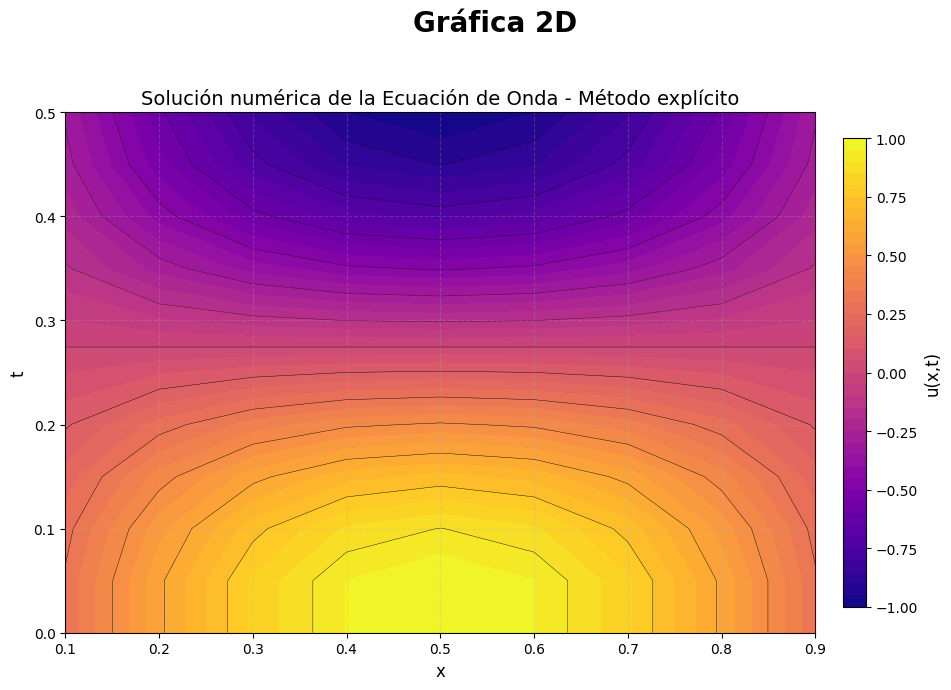

In [ ]:

plt.figure(figsize=(10, 7))
plt.suptitle("Gráfica 2D", fontsize=20, fontweight="bold")
contour = plt.contourf(X, Y, U_np, levels=40, cmap="plasma")
plt.contour(X, Y, U_np, levels=15, colors="black", linewidths=0.3)
cbar = plt.colorbar(contour, shrink=0.9, pad=0.03)
cbar.set_label("u(x,t)", fontsize=12)
plt.title("Solución numérica de la Ecuación de Onda - Método explícito", fontsize=14)  #subtitulo
plt.xlabel("x", fontsize=12)
plt.ylabel("t", fontsize=12)
plt.grid(alpha=0.25, linestyle="--")
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Da espacio entre el titulo y el subtitulo
plt.show()


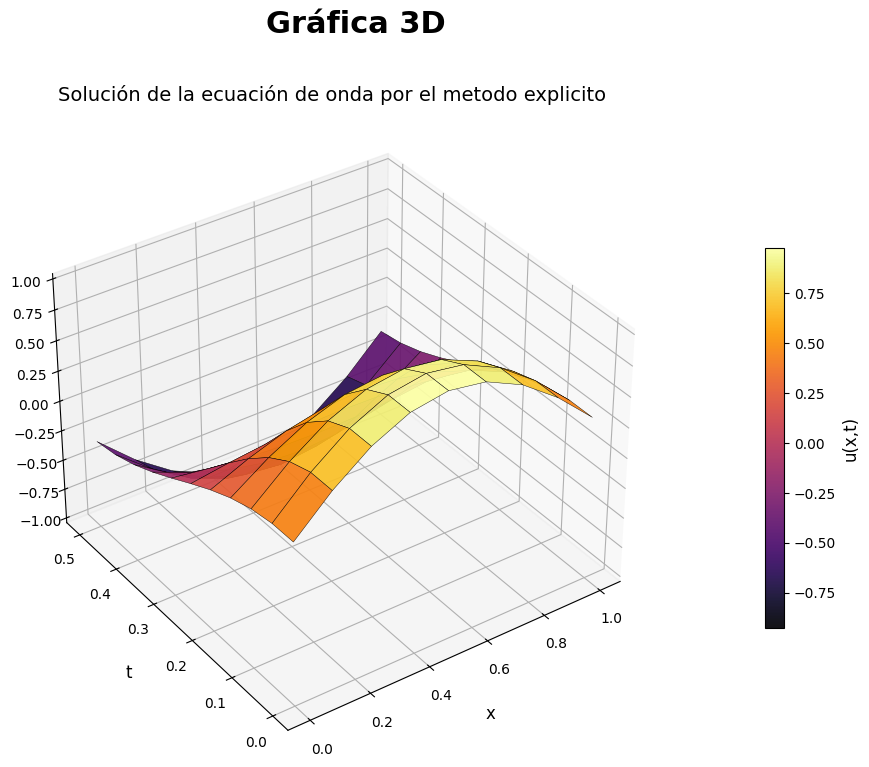

In [ ]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Gráfica 3D", fontsize=22, fontweight="bold", y=0.95)
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    X, Y, U_np,
    cmap=cm.inferno,       # colormap
    edgecolor='k',         # líneas finas
    linewidth=0.3,
    alpha=0.92,            # transparencia
    antialiased=True       # suavizado
)

ax.view_init(elev=35, azim=235)
ax.set_title('Solución de la ecuación de onda por el metodo explicito',
             fontsize=14, pad=15)
ax.set_xlabel('x', fontsize=12, labelpad=10)
ax.set_ylabel('t', fontsize=12, labelpad=10)
ax.set_zlabel('u(x, t)', fontsize=12, labelpad=10)

# Barra de colores
cbar = fig.colorbar(surf, shrink=0.6, aspect=20, pad=0.1)
cbar.set_label("u(x,t)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()



***Ejercicio 2:*** Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.

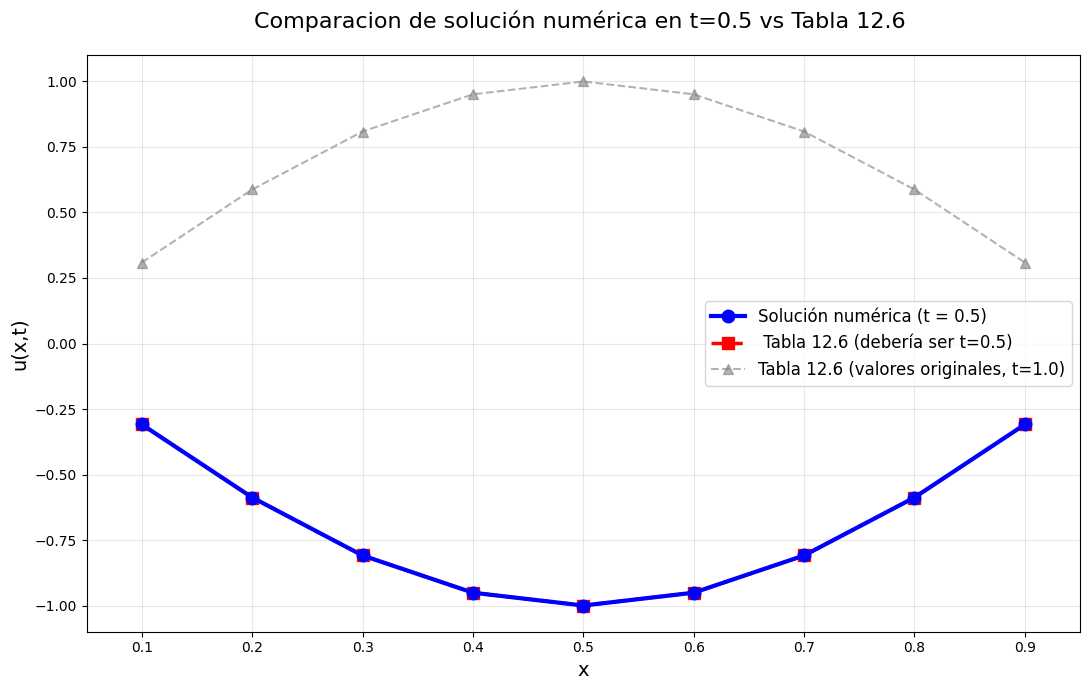

In [ ]:


# Puntos x interiores (0.1 a 0.9)
x_int = np.linspace(0.1, 0.9, 9)

# valores numéricos en t=0.5 (última fila con j=11)
u_num_t05 = U_np[-1, :]

# Valores de la Tabla 12.6 ( corresponden a t=1.0) es t=1.0 por que en la imagen aparece W_i,20
tabla_positiva = np.array([
    0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163,
    1.0000000000, 0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944
])



# Gráfica
plt.figure(figsize=(11, 7))

# valores numéricos en t=0.5
plt.plot(x_int, u_num_t05, 'o-', color='blue', linewidth=3, markersize=9,
         label='Solución numérica (t = 0.5)', zorder=5)

# Tabla 12.6 (lo que debería dar en t=0.5)
plt.plot(x_int, -tabla_positiva, 's--', color='red', linewidth=2.5, markersize=8,
         label=' Tabla 12.6 (debería ser t=0.5)', zorder=4)
plt.plot(x_int, tabla_positiva, '^--', color='gray', alpha=0.6, markersize=7,
         label='Tabla 12.6 (valores originales, t=1.0)')
plt.title(
          'Comparacion de solución numérica en t=0.5 vs Tabla 12.6 ',
          fontsize=16, pad=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('u(x,t)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(-1.1, 1.1)
plt.xlim(0.05, 0.95)



plt.tight_layout()
plt.show()



In [ ]:

tabla_esperada_t05 = tabla_positiva
# Puntos internor
x_int = np.linspace(0.1, 0.9, 9)

# Cálculo del error
error = u_num_t05 - tabla_esperada_t05
error_abs = np.abs(error)

# Tabla comparativa
print("Comparación en t = 0.5 con Tabla 12.6:\n")
print(tabulate(
    np.column_stack([x_int, u_num_t05, tabla_esperada_t05, error, error_abs]),
    headers=["x", "u_numérico(t=0.5)", "Tabla 12.6", "Error", "|Error|"],
    floatfmt=".12f",
    tablefmt="pretty"
))

Comparación en t = 0.5 con Tabla 12.6:

+---------------------+----------------------+--------------+---------------------+--------------------+
|          x          |  u_numérico(t=0.5)   |  Tabla 12.6  |        Error        |      |Error|       |
+---------------------+----------------------+--------------+---------------------+--------------------+
|         0.1         | -0.30901699437494756 | 0.3090169944 | -0.6180339887749475 | 0.6180339887749475 |
|         0.2         | -0.5877852522924736  | 0.5877852523 | -1.1755705045924736 | 1.1755705045924736 |
| 0.30000000000000004 | -0.8090169943749476  | 0.8090169944 | -1.6180339887749475 | 1.6180339887749475 |
|         0.4         | -0.9510565162951534  | 0.9510565163 | -1.9021130325951534 | 1.9021130325951534 |
|         0.5         |         -1.0         |     1.0      |        -2.0         |        2.0         |
|         0.6         | -0.9510565162951533  | 0.9510565163 | -1.9021130325951532 | 1.9021130325951532 |
| 0.70000000000

Error absoluto en cada punto:
  x = 0.1 → |error| = 0.618033988775
  x = 0.2 → |error| = 1.175570504592
  x = 0.3 → |error| = 1.618033988775
  x = 0.4 → |error| = 1.902113032595
  x = 0.5 → |error| = 2.000000000000
  x = 0.6 → |error| = 1.902113032595
  x = 0.7 → |error| = 1.618033988775
  x = 0.8 → |error| = 1.175570504592
  x = 0.9 → |error| = 0.618033988775


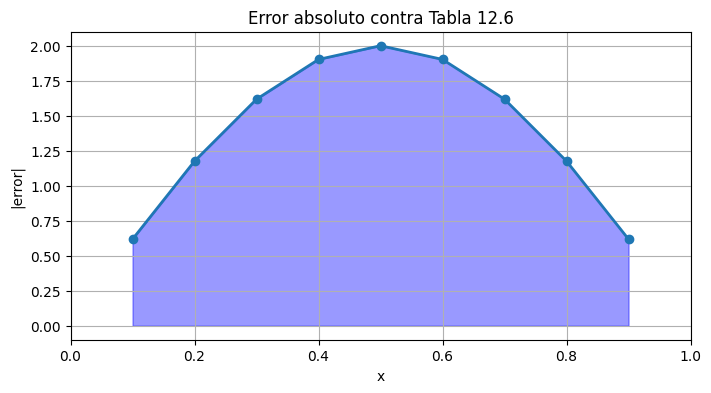

In [ ]:
# ================================
#   Gráfica del error absoluto
# ================================
plt.figure(figsize=(8,4))
plt.plot(tabla_x_int, error_abs_tabla, "o-", linewidth=2)
plt.title("Error absoluto contra Tabla 12.6")
plt.fill_between(x_int, error_abs, 0, color='blue', alpha=0.4)
plt.xlabel("x")
plt.ylabel("|error|")
plt.grid(True)
plt.xlim(0,1)

print("Error absoluto en cada punto:")
for x, err in zip(x_int, error_abs):
    print(f"  x = {x:.1f} → |error| = {err:.12f}")
plt.show()


***Ejercicio 3***: Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.

In [ ]:
# errores
error = U_num - U_exact
error_abs = np.abs(error)
L_inf = np.max(error_abs)
L2 = np.sqrt(np.sum(error**2) / len(error))

# tabla comparativa
print("Comparación Numérica vs Exacta (t = 0.5)")
print(tabulate(np.vstack([x_internal, U_num, U_exact, error]).T,
               headers=["x", "Numérica", "Exacta", "Error"], floatfmt=".6f"))

Comparación Numérica vs Exacta (t = 0.5)
       x    Numérica     Exacta      Error
--------  ----------  ---------  ---------
0.100000   -0.309017  -0.309017  -0.000000
0.200000   -0.587785  -0.587785  -0.000000
0.300000   -0.809017  -0.809017  -0.000000
0.400000   -0.951057  -0.951057   0.000000
0.500000   -1.000000  -1.000000   0.000000
0.600000   -0.951057  -0.951057   0.000000
0.700000   -0.809017  -0.809017   0.000000
0.800000   -0.587785  -0.587785   0.000000
0.900000   -0.309017  -0.309017   0.000000


In [ ]:
# impresión de normas
print(f"\nNormas de error sobre nodos internos (0.1..0.9): L_inf = {L_inf:.3e}, L2 = {L2:.3e}\n")


Normas de error sobre nodos internos (0.1..0.9): L_inf = 5.551e-16, L2 = 2.656e-16



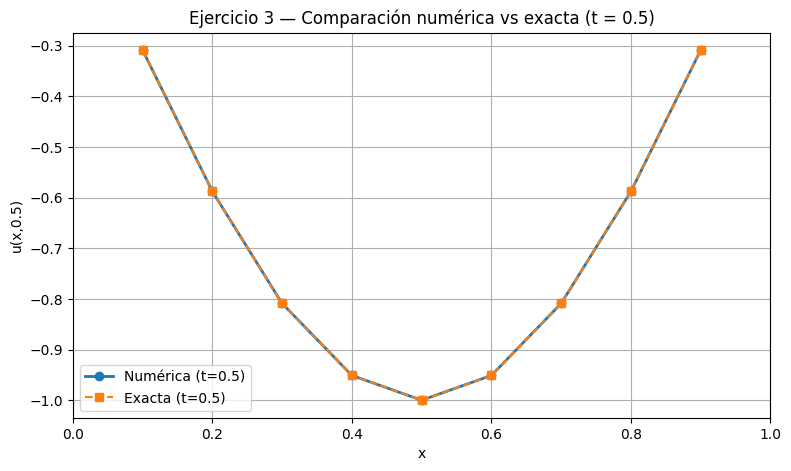

In [ ]:
# gráfica: numérica vs exacta
plt.figure(figsize=(9,5))
plt.plot(x_internal, U_num, 'o-', label='Numérica (t=0.5)', linewidth=2)
plt.plot(x_internal, U_exact, 's--', label='Exacta (t=0.5)', linewidth=1.5)
plt.xlabel("x")
plt.ylabel("u(x,0.5)")
plt.title("Ejercicio 3 — Comparación numérica vs exacta (t = 0.5)")
plt.xlim(0,1)
plt.grid(True)
plt.legend()
plt.show()

In [293]:
U_exact

array([-0.30901699, -0.58778525, -0.80901699, -0.95105652, -1.        ,
       -0.95105652, -0.80901699, -0.58778525, -0.30901699])

***Ejercicio 4***: Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.

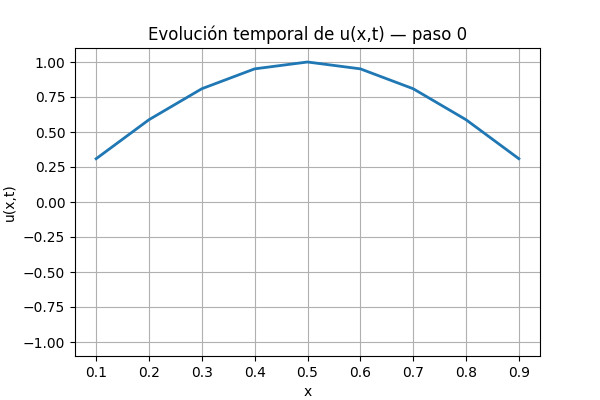

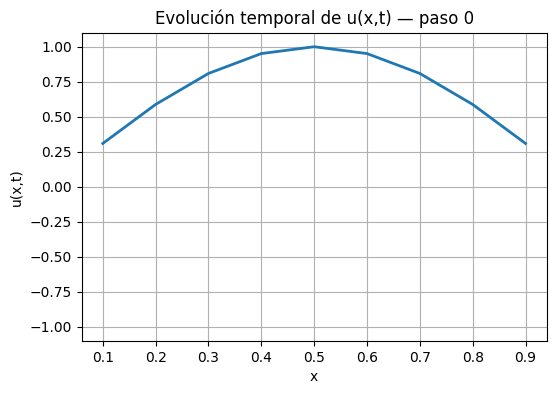

In [ ]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

# ===============================================================
#   ANIMACIÓN DEL COMPORTAMIENTO DE LA SOLUCIÓN (GIF)
# generamos un GIF que muestra la evolución temporal de u(x,t)

# ===============================================================


# U_np tiene forma (j, 9) con los nodos internos

U_anim = U_np.copy()

# Crear figura
fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot(x_internal, U_anim[0], linewidth=2)

ax.set_title("Evolución de la solución u(x,t)")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_ylim(np.min(U_anim)*1.1, np.max(U_anim)*1.1)
ax.grid(True)

# Función que actualiza cada frame del GIF
def update(frame):
    line.set_ydata(U_anim[frame])
    ax.set_title(f"Evolución temporal de u(x,t) — paso {frame}")
    return line,

# Crear animación
anim = animation.FuncAnimation(fig, update, frames=j, interval=150)


gif_path = "solucion_animada.gif"
anim.save(gif_path, writer=PillowWriter(fps=8))

# Mostrar GIF
from IPython.display import Image
Image(filename=gif_path)